# Análisis exploratorio de Datos (EDA)
* Parte 1:
1) Análisis de las características
2) Encontrar cualquier relacion o tendencia considerando múltiples caracteristicas

* Parte 2:
1) Agregar algunas características
2) Eliminar funciones redundantes
3) Convertir características en forma adecuada para modelar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# inline: Para que los gráficos aparezcan en la misma fila
%matplotlib inline

In [2]:
data = pd.read_csv('train_titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#variable objetivo: survived (y saber por qué sobrevivieron)
#revisar la cantidad de valores nulos (NaN) dentro de mi DataFrame
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 0, 'Sexo')

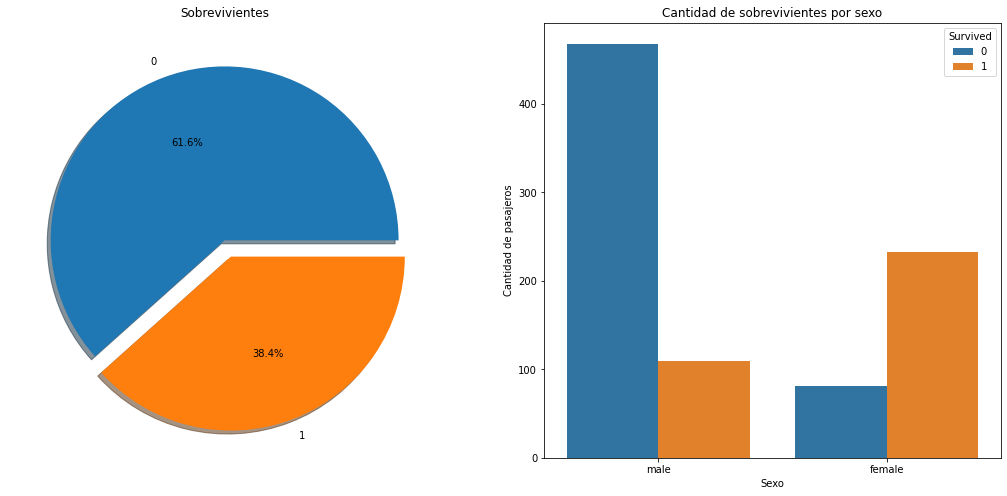

In [13]:
#Se crea gráfico: cantidad de sobrevivientes (0 = muertos / 1 = sobrevivientes)
# Se crean 2 graficos (f y ax)
f, ax = plt.subplots(1,2, figsize = (18,8))

#Contar los pasajeros que sobrevivieron y fallecieron.
#Los datos se muestran en grafico de torta (plot.pie)
# explode: separa un poco el grafico
# shadow: sombrea el grafico
data['Survived'].value_counts().plot.pie(autopct = '%1.1f%%' , ax = ax[0], explode = [0, 0.1], shadow = True)

# cambiar titulos al grafico 1
ax[0].set_title('Sobrevivientes')
# borrar el label del eje y
ax[0].set_ylabel('')


##Grafico 2: 
# 'Sex' en el eje x
# hue: cómo se van a agrupar los datos
sns.countplot('Sex', hue = 'Survived', data = data, ax  = ax[1])
ax[1].set_title('Cantidad de sobrevivientes por sexo')
ax[1].set_ylabel('Cantidad de pasajeros')
ax[1].set_xlabel('Sexo')


## Analizando los gráficos, la cantidad de mujeres que sobrevivieron fue mayor a la de hombres